# BBC News Article Recommender  System
 

## 1. Purpose

As we learned and do a lot of exercise on this Unsuperisor learning course, like recommender  system and News Article category. But I am thinking about in the real world, while we surf on internet and read a news article, the system cannot get our personal privacy data, so mostly for a news system they need a recommender system on content base. 

On Week4 we did the BBC News catgory programming, is there a way we can do a recommender system for BBC News Article

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
 
import os

## 2. Load BBC Articles Data

In [2]:
data_train = pd.read_csv('E:\\University of Colorado Boulder\\12- Unsupevised Algorithms in Machine Learning\\Week4\\learn-ai-bbc\\BBC News Train.csv', delimiter=',')

## 3. Extracting word features and show Exploratory Data Analysis (EDA)

In [3]:
print(data_train.info())
print(data_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business


In [4]:
print(data_train.describe(include = 'object'))

                                                     Text Category
count                                                1490     1490
unique                                               1440        5
top     queen recruit singer for new tour the remainin...    sport
freq                                                    2      346


In [5]:
print("Total observations ", len(data_train))
print("Total Count of Unique Article IDs ", len(data_train['ArticleId'].unique()))

Total observations  1490
Total Count of Unique Article IDs  1490


Tech the smallest category makes up this percentage: 0.175
Sport the largest category makes up this percentage: 0.232


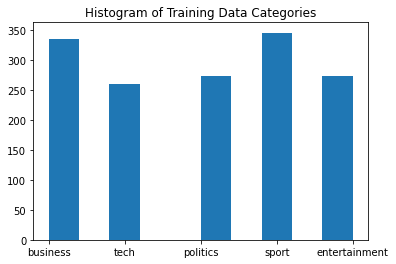

In [6]:
plt.hist(data_train['Category'])
plt.title("Histogram of Training Data Categories")
print("Tech the smallest category makes up this percentage:", round(len(data_train[data_train['Category'] == 'tech'])/ len(data_train),3))
print("Sport the largest category makes up this percentage:", round(len(data_train[data_train['Category'] == 'sport'])/ len(data_train),3))
categories = data_train['Category'].unique()

295
Smallest Article  90
Largest Article  3345


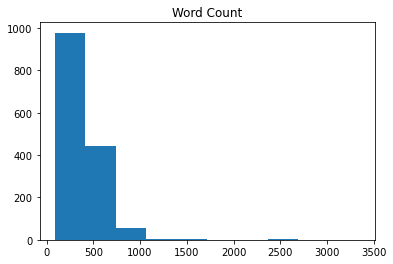

In [7]:
a = []
for txt in data_train['Text']:
    a.append(len(txt.split()))

print(len(txt.split()) )
plt.hist(a)
plt.title("Word Count")
print("Smallest Article ", min(a))
print("Largest Article " , max(a))

In [8]:
data_train.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [9]:
data_train['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [10]:
target_category = data_train['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


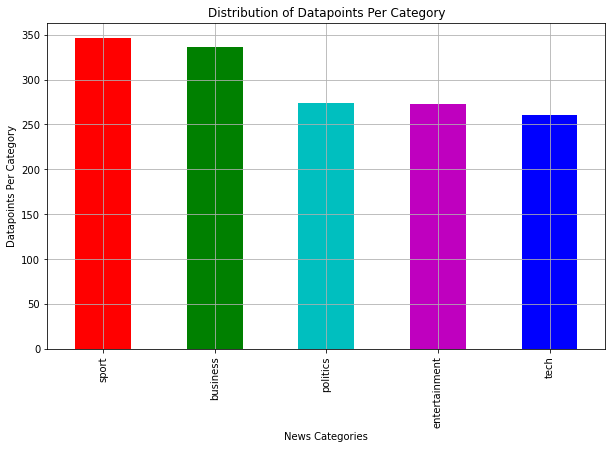

In [11]:
news_cat = data_train['Category'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['r','g','c','m','b']
news_cat.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("News Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.show()

# 4. Clean Data

In [12]:
print(data_train.isna().sum())
# data_train =data_train.fillna(0)       
# data_train[[  'website','title' ,'content']] = data_train[[ 'website','title' ,'content']].fillna(value=0)
data_train[[   'Text' ,'Category']] = data_train[[ 'Text' ,'Category']].fillna(value='')
data_train.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64


ArticleId    0
Text         0
Category     0
dtype: int64

In [13]:
#lowercase
data_train['Text'] = data_train.Text.apply(lambda x: x.lower())
data_train['Category'] = data_train['Category'].astype(str)
data_train['Category'] = data_train.Category.apply(lambda x: x.lower())
print(data_train['Text']) 

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object


In [14]:
import string
table = str.maketrans("", "", string.punctuation)
def remove_punc(text):
    return text.translate(table)

In [15]:
data_train['Text'] = data_train.Text.apply(lambda x: remove_punc(x))
data_train['Category'] = data_train.Category.apply(lambda x: remove_punc(x))
 
data_train.head(2)

,ArticleId,Text,Category
0,1833,worldcom exboss launches defence lawyers defen...,business
1,154,german business confidence slides german busin...,business


In [16]:
#Remove stopwords

from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def rem_stop(text):
    word_list = [word for word in text.split() if word not in stop]
    return " ".join(word_list)

In [17]:
data_train['Text'] = data_train.Text.apply(lambda x: rem_stop(x))
data_train['Category'] = data_train.Category.apply(lambda x: rem_stop(x))
 
data_train.head(2)

,ArticleId,Text,Category
0,1833,worldcom exboss launches defence lawyers defen...,business
1,154,german business confidence slides german busin...,business


173
Smallest Article  48
Largest Article  1695


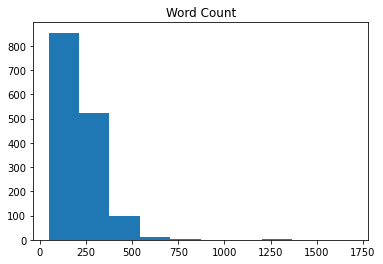

In [18]:
a = []
for txt in data_train['Text']:
    a.append(len(txt.split()))

print(len(txt.split()) )
plt.hist(a)
plt.title("Word Count")
print("Smallest Article ", min(a))
print("Largest Article " , max(a))

In [19]:
# # Convert a collection of raw documents to a matrix of TF-IDF features
# from sklearn.decomposition import NMF 
 
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidvec = TfidfVectorizer(min_df = 2,
#                           max_df = 0.95,
#                           norm = 'l2',
#                           stop_words = 'english')
# tfidvec_train = tfidvec.fit_transform(data_train['Text'] )


## 5. Bag of Words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
bowmatrix = bow.fit_transform(data_train['Text']).toarray()

In [21]:
print(bowmatrix.shape)

(1490, 27105)


## 6. Recommender (Content based)

## 6.1 cosine_similarity

In [22]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
nn = NearestNeighbors()
score = cosine_similarity(bowmatrix)

In [23]:
print(score)

[[1.         0.09598577 0.0720711  ... 0.12936484 0.10597533 0.05776981]
 [0.09598577 1.         0.19346739 ... 0.19909945 0.11120573 0.06668313]
 [0.0720711  0.19346739 1.         ... 0.12654858 0.142628   0.07379379]
 ...
 [0.12936484 0.19909945 0.12654858 ... 1.         0.16020243 0.05841693]
 [0.10597533 0.11120573 0.142628   ... 0.16020243 1.         0.05438067]
 [0.05776981 0.06668313 0.07379379 ... 0.05841693 0.05438067 1.        ]]


In [24]:
def Neighbor_by_cosine(article):
    row_num = data_train[data_train['ArticleId'] == article].index.values[0] #getting the index of the article
    similarity_score = list(enumerate(score[row_num])) #similar articles
    sorted_score = sorted(similarity_score, key=lambda x:x[1], reverse= True)[1:6] #sorting similar articles and returning the first 5
    print('Current Article:',data_train.iloc[row_num])
    i = 0
    print('Cosine Recommend Article:')
    recommendations =[]
    for item in sorted_score:
 
        print(data_train.iloc[data_train.index == item[0]])
        article_id = data_train[data_train.index == item[0]]["ArticleId"].values[0] #getting the article title
        category = data_train[data_train.index == item[0]]["Category"].values[0] #getting the article title
        Text = data_train[data_train.index == item[0]]["Text"].values[0] #getting the article title
        recommendations.append([i+1,article_id, category]) 
 
        i = i + 1
    return recommendations #returns the 5 nearest article titles

## 6.2 Jaccard_similarity

In [25]:
#  Use Jaccard to get the similar article
from sklearn.metrics.pairwise import pairwise_distances 
jaccard = pairwise_distances(bowmatrix, bowmatrix, metric="jaccard", n_jobs=-1)
jaccard = 1 - jaccard

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [26]:
def Neighbor_by_jaccard(article):
    row_num = data_train[data_train['ArticleId'] == article].index.values[0] #getting the index of the article
    similarity_score = list(enumerate(jaccard[row_num])) #similar articles
    sorted_score = sorted(similarity_score, key=lambda x:x[1], reverse= True)[1:6] #sorting similar articles and returning the first 5
    print('Current Article:',data_train.iloc[row_num])
    i = 0
    print('Jaccard Recommend Article:')
    recommendations =[]
    for item in sorted_score:
 
        print(data_train.iloc[data_train.index == item[0]])
        article_id = data_train[data_train.index == item[0]]["ArticleId"].values[0] #getting the article title
        category = data_train[data_train.index == item[0]]["Category"].values[0] #getting the article title
        Text = data_train[data_train.index == item[0]]["Text"].values[0] #getting the article title
       
        recommendations.append([i+1,article_id, category]) 
 
        i = i + 1
    return recommendations #returns the 5 nearest article titles

## 7. Verify the Recommender  Result

The BBC Article have 5 categories, to verify the recommand articles result on content base, we have to check if the  recommend articles are really similar or related to the original article.

I think we can verify it from the following two items:

    1. The recommend article should belong to the same category
    2. The recommend article should discuss the same or similar topic, The BBC article dataset didn't provide us the title, we have to find the topic from content
    
So we will verify all five categories:

    Business
    Tech
    entertainment
    politics
    sport
    

### 7.1 Verify Business Category

In [27]:
Neighbor_by_cosine(1833)
Neighbor_by_jaccard(1833)

Current Article: ArticleId                                                 1833
Text         worldcom exboss launches defence lawyers defen...
Category                                              business
Name: 0, dtype: object
Cosine Recommend Article:
     ArticleId                                               Text  Category
878       1238  worldcom director ends evidence former chief f...  business
      ArticleId                                               Text  Category
1395       1413  worldcom director admits lying former chief fi...  business
     ArticleId                                               Text  Category
233          2  worldcom boss left books alone former worldcom...  business
     ArticleId                                               Text  Category
645       1143  ebbers denies worldcom fraud former worldcom c...  business
     ArticleId                                               Text  Category
381       1793  worldcom bosses 54m payout ten former direc

[[1, 1238, 'business'],
 [2, 1413, 'business'],
 [3, 1143, 'business'],
 [4, 2, 'business'],
 [5, 758, 'business']]

### 7.2 Verify Tech Category

In [28]:
Neighbor_by_cosine(1976)
Neighbor_by_jaccard(1976)

Current Article: ArticleId                                                 1976
Text         lifestyle governs mobile choice faster better ...
Category                                                  tech
Name: 3, dtype: object
Cosine Recommend Article:
     ArticleId                                               Text Category
435       2175  lifestyle governs mobile choice faster better ...     tech
      ArticleId                                               Text Category
1320        860  finding new homes old phones reusing old mobil...     tech
     ArticleId                                               Text Category
978       1755  home phones face unclear future fixed line pho...     tech
     ArticleId                                               Text Category
602       2030  friends fear lost mobiles people becoming depe...     tech
      ArticleId                                               Text Category
1105       1831  tough rules ringtone sellers firms flout rules... 

[[1, 2175, 'tech'],
 [2, 860, 'tech'],
 [3, 2009, 'tech'],
 [4, 1363, 'tech'],
 [5, 1428, 'tech']]

### 7.3 Verify entertainment Category

In [29]:
 
Neighbor_by_cosine(177)
Neighbor_by_jaccard(177)

Current Article: ArticleId                                                  177
Text         carry star patsy rowlands dies actress patsy r...
Category                                         entertainment
Name: 21, dtype: object
Cosine Recommend Article:
     ArticleId                                               Text  \
270       1017  brookside actress keaveney dies actress anna k...   

          Category  
270  entertainment  
      ArticleId                                               Text  \
1402       1421  hoffman hits modern film hollywood legend dust...   

           Category  
1402  entertainment  
     ArticleId                                               Text  \
304       1141  film star fox behind theatre bid leading actor...   

          Category  
304  entertainment  
     ArticleId                                               Text  \
312        962  stars shine bafta red carpet hollywood stars b...   

          Category  
312  entertainment  
     ArticleId  

[[1, 1017, 'entertainment'],
 [2, 301, 'entertainment'],
 [3, 1248, 'entertainment'],
 [4, 1491, 'entertainment'],
 [5, 121, 'entertainment']]

### 7.4 Verify politics Category

In [30]:
Neighbor_by_cosine(2100)
Neighbor_by_jaccard(2100)

Current Article: ArticleId                                                 2100
Text         security papers found street inquiry way files...
Category                                              politics
Name: 33, dtype: object
Cosine Recommend Article:
     ArticleId                                               Text  Category
480       1170  pakistani women must hide hiding women away ho...  politics
    ArticleId                                               Text  Category
67        947  tories outlining policing plans local communit...  politics
      ArticleId                                               Text  Category
1060       1978  row police power csos police federation said s...  politics
     ArticleId                                               Text  Category
768        701  blunkett unveils policing plans people could g...  politics
      ArticleId                                               Text  Category
1273        946  guantanamo four questioned four britons fr

[[1, 1170, 'politics'],
 [2, 609, 'politics'],
 [3, 870, 'politics'],
 [4, 1053, 'tech'],
 [5, 555, 'politics']]

### 7.5 Verify sport Category

In [31]:
Neighbor_by_cosine(1026)
Neighbor_by_jaccard(1026)

Current Article: ArticleId                                                 1026
Text         henman face saulnier test british number one t...
Category                                                 sport
Name: 27, dtype: object
Cosine Recommend Article:
     ArticleId                                               Text Category
767        252  federer joins alltime greats last year seen on...    sport
      ArticleId                                               Text Category
1199       1403  davenport dismantles young rival top seed lind...    sport
    ArticleId                                               Text Category
17        486  hantuchova dubai last eight daniela hantuchova...    sport
     ArticleId                                               Text Category
709        361  henman murray claim lta awards tim henman name...    sport
    ArticleId                                               Text Category
22       1785  serena becomes world number two serena william...    sp

[[1, 1403, 'sport'],
 [2, 252, 'sport'],
 [3, 486, 'sport'],
 [4, 102, 'sport'],
 [5, 1538, 'sport']]

## 8. Conclusion

Recommend system works for using  unsuperivsor learning to get the content similar article

Cosine Method is better than Jaccard distance Method